# Loading necessary values for testing

In [1]:
# plot the loss and accuracy
import pickle
from tensorflow.keras.models import load_model

with open('multiclass_classification_model_Adam_history', 'rb') as file_pi:
    history = pickle.load(file_pi)

model = load_model('multiclass_classification_model_Adam.h5')

X_test = pickle.load(open('multiclass_classification_model_Adam_X_test', 'rb'))
y_test_one_hot = pickle.load(open('multiclass_classification_model_Adam_y_test', 'rb'))


# Training and validation graphs
* Comparing the training loss and validation loss
* Comparing the training accuracy and validation accuracy
* Comparing the training AUC and the validation AUC
* Comparing the training MSE and the validation MSE

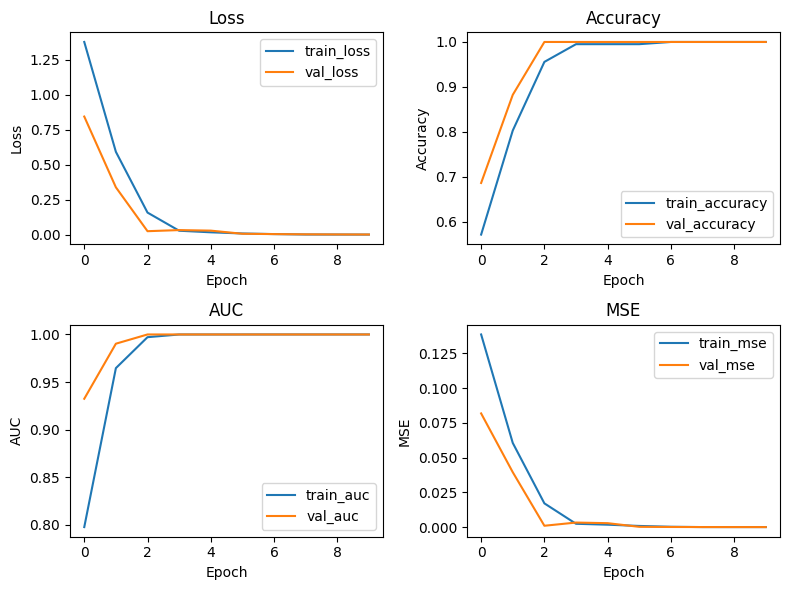

In [8]:
import matplotlib.pyplot as plt

# Create a 2x2 grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

# Plot Loss
axes[0, 0].plot(history.history['loss'], label='train_loss')
axes[0, 0].plot(history.history['val_loss'], label='val_loss')
axes[0, 0].set_title('Loss')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()

# Plot Accuracy
axes[0, 1].plot(history.history['accuracy'], label='train_accuracy')
axes[0, 1].plot(history.history['val_accuracy'], label='val_accuracy')
axes[0, 1].set_title('Accuracy')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].legend()

# Plot AUC
axes[1, 0].plot(history.history['auc'], label='train_auc')
axes[1, 0].plot(history.history['val_auc'], label='val_auc')
axes[1, 0].set_title('AUC')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('AUC')
axes[1, 0].legend()

# Plot MSE
axes[1, 1].plot(history.history['mean_squared_error'], label='train_mse')
axes[1, 1].plot(history.history['val_mean_squared_error'], label='val_mse')
axes[1, 1].set_title('MSE')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('MSE')
axes[1, 1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


# Testing results
* Confusion matrix with the selection rate per category
* Confusion matrix per category with:
    * precision
    * recall
    * f1-score
    * support
* Avaraged values of:
    * precision
    * recall
    * f1-score
    * support
* Total loss during validation

2/2 [==============================] - 0s 37ms/step


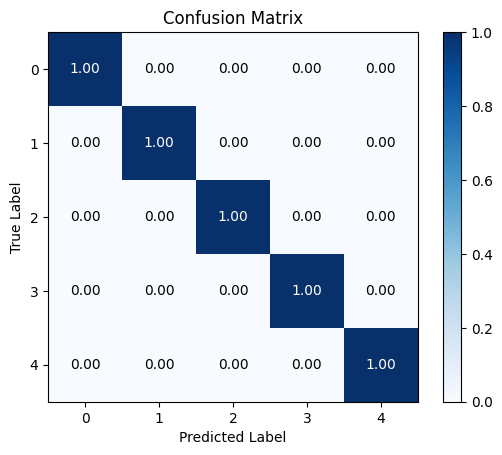

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         9

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51

____________________________________________________________

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Loss: 0.0011


In [18]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report


y_pred = model.predict(X_test)

# Convert one-hot encoded labels to class labels for y_test
y_test_labels = np.argmax(y_test_one_hot, axis=1)

# Convert one-hot encoded labels to class labels for y_pred
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)

# Normalize confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create a DataFrame for better visualization
df_cm = pd.DataFrame(cm, index=[i for i in range(5)], columns=[i for i in range(5)])


# Plot the confusion matrix with accuracy scores on the side using imshow
plt.imshow(df_cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = [0, 1, 2, 3, 4]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Add text annotations
thresh = df_cm.max() / 2.0
for i, j in itertools.product(range(df_cm.shape[0]), range(df_cm.shape[1])):
    plt.text(j, i, f"{df_cm.iloc[i, j]:.2f}", ha="center", va="center", color="white" if df_cm.iloc[i, j] > thresh.iloc[0] else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print(classification_report(y_test_labels, y_pred_labels))
print("_"*60 + "\n")
print(f"Accuracy: {accuracy_score(y_test_labels, y_pred_labels):.4f}")
print(f"Precision: {precision_score(y_test_labels, y_pred_labels, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test_labels, y_pred_labels, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test_labels, y_pred_labels, average='weighted'):.4f}")
print(f"Loss: {history.history['val_loss'][-1]:.4f}")
